<a href="https://colab.research.google.com/github/TomekGniazdowski/bellman-ford-algorithm/blob/main/projekt_zespo%C5%82owy_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

In [3]:
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0

File ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’ already there; not retrieving.

Selecting previously unselected package cuda-repo-ubuntu1804.
(Reading database ... 124236 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1804_10.0.130-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1804 (10.0.130-1) ...
Setting up cuda-repo-ubuntu1804 (10.0.130-1) ...
Executing: /tmp/apt-key-gpghome.ZEw1LC16HT/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub'
gpg: key F60F4B3D7FA2AF80: "cudatools <cudatools@nvidia.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x8

In [11]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [12]:
%tensorflow_version 1.x
import tensorflow
!pip install q keras==2.2.4
import keras

In [13]:
print(tensorflow.__version__, tensorflow.test.is_gpu_available())
print(keras.__version__)

1.15.2 True
2.2.4


In [14]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (562/562), done.
Checking out files: 100% (76/76), done.


In [15]:
%cd Mask_RCNN
!python setup.py install

/content/Mask_RCNN/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.

In [16]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [17]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.utils import Dataset
import mrcnn.config

from matplotlib import pyplot
from matplotlib.patches import Rectangle
import cv2 as cv
import cv2 as cv
import glob
import xml.etree.ElementTree as ET
import numpy as np
import random

from google.colab.patches import cv2_imshow 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
image_train_list = []
image_test_list = []
data_amount_train = 490
data_amount_test = 4
learning_ratio = 1


# sprawdzenie, czy zbiory danych uczacyh i testowych zostaly stworzone poprawnie
def check_data():
    flag = 0
    for train in image_train_list:
        for test in image_test_list:
            if train == test:
                flag = -1
    if len(image_train_list) == len(set(image_train_list)) and len(image_test_list) == len(set(image_test_list)):
        pass
    else:
        flag = -1
    return flag

# wyswietlenie informacji o zbiorach
def print_data_info(set):
    i = 0
    print('***********************************************************************************************************')
    print('Set len:', len(set.image_ids))
    for id in set.image_ids:
        show_img_with_mask(set, id)
        info_train = set.image_info[id]
        print(info_train)
        if i == 2:
            break
        i += 1


# skalowanie obrazow
def img_scale(img, scale):
    # pobranie wymiarow, ich modyfikacja
    h = int(img.shape[0] * scale)
    w = int(img.shape[1] * scale)
    dim = (w, h)
    # zwrocenie przeskalowanego obrazu interpolowanego okreslona metoda
    return cv.resize(img, dim, interpolation=cv.INTER_LANCZOS4)


# sprawdzenie, czy plik xml o danej nazwie istnieje
def is_annot_exist(all_annots, image_name):
    for annot in all_annots:
        annot_name = annot.replace('.xml', '')
        if annot_name == image_name:
            return True
    return False


# zwrocenie obrazu z nalozona maska
def show_img_with_mask(set, id):
    img = set.load_image(id)
    mask, class_id = set.load_mask(id)
    box = extract_bboxes(mask)
    display_instances(img, box, mask, class_id, set.class_names)


# usuniecie zbednego info z nazwy pliku
def remove_folder_name(all_files, folder_name):
    for i in range(len(all_files)):
        all_files[i] = all_files[i].replace(folder_name, '')
    return all_files

In [19]:
class Tables_data_set(Dataset):
  # zaladowanie zbioru danych -> dokumentacja mask rcnn
    def load_dataset(self, data_set_dir, is_train):
        self.add_class('data_set', 1, 'table')
        image_dir = data_set_dir + '/images/'
        annotations_dir = data_set_dir + '/annots/'
        all_images = glob.glob(image_dir + '*.bmp')
        all_images = remove_folder_name(all_images, '/content/drive/MyDrive/Zbiory danych/Marmot/images/')
        all_annots = glob.glob(annotations_dir + '*.xml')
        all_annots = remove_folder_name(all_annots, '/content/drive/MyDrive/Zbiory danych/Marmot/annots/')
        random.shuffle(all_images)
        index = 0
        for image in all_images:
            image_name = image.replace('.bmp', '')
            if is_annot_exist(all_annots, image_name) is True:
                image_path = image_dir + image
                ann_path = annotations_dir + image_name + '.xml'
                if (is_train is True and index < data_amount_train) or \
                        (is_train is False and index < data_amount_test):
                    if is_train is True:
                        image_train_list.append(image_name)
                        self.add_image('data_set', image_id=image_name, path=image_path, annotation=ann_path)
                        index+=1
                    elif is_train is False:
                        flag = 0
                        for image_name_train in image_train_list:
                            if image_name == image_name_train:
                                flag = 1
                                break
                        if flag == 0:
                            image_test_list.append(image_name)
                            self.add_image('data_set', image_id=image_name, path=image_path, annotation=ann_path)
                            index += 1
    
    # uzyskanie wspolrzednych prostokatow
    def extract_boxes(self, file_name):
        boxes = []
        tree = ET.parse(file_name)
        root = tree.getroot()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coordinates = [xmin, ymin, xmax, ymax]
            boxes.append(coordinates)
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

    # zaladowanie pelnej maski
    def load_mask(self, image_id):
        # info o danym obrazie
        info = self.image_info[image_id]
        path = info['annotation']
        # ladowanie pliku XML
        boxes, w, h = self.extract_boxes(path)
        # maska -> ma wymiary jak obraz, kazdy obiekt znajduje się w kolejnej przestrzeni
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        # tworzy maske
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('table'))
        return masks, np.asarray(class_ids, dtype='int32')

    # zwraca info o obrazie
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']


# konfiguracja do detekcji
class Table_config(Config):
    NAME = "table_recognition"
    GPU_COUNT = 1
    # IMAGES_PER_GPU = 8
    # 1 -> tło, 1 -> tabela
    NUM_CLASSES = 1 + 1
    DETECTION_MIN_CONFIDENCE = 0.9
    # ilosc elementow uczacych
    STEPS_PER_EPOCH = int(data_amount_train)

***********************************************************************************************************
Set len: 490


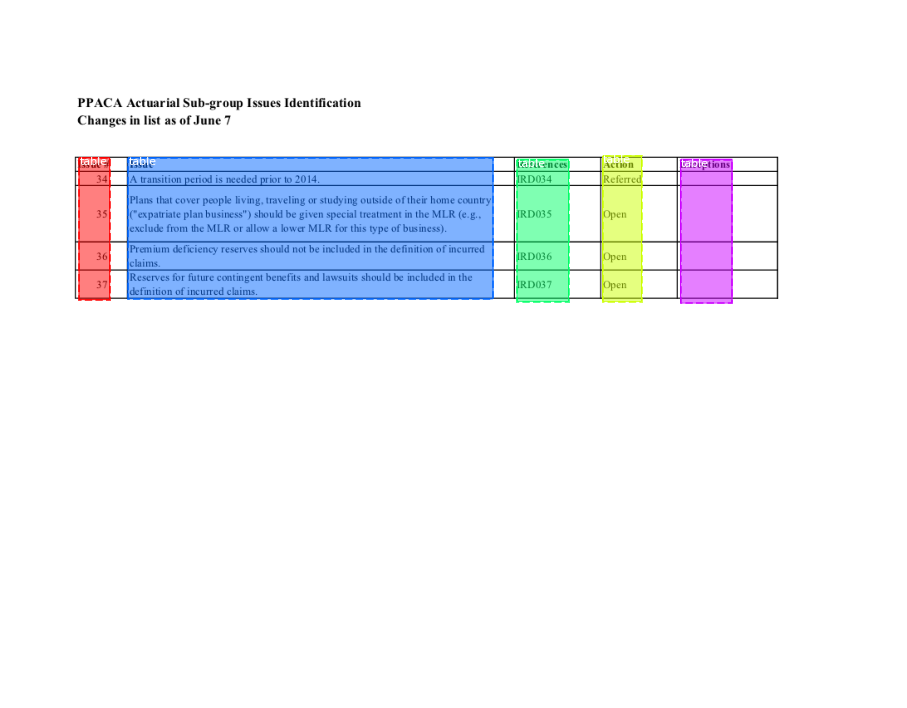

{'id': '10.1.1.177.3007_20', 'source': 'data_set', 'path': '/content/drive/MyDrive/Zbiory danych/Marmot/images/10.1.1.177.3007_20.bmp', 'annotation': '/content/drive/MyDrive/Zbiory danych/Marmot/annots/10.1.1.177.3007_20.xml'}


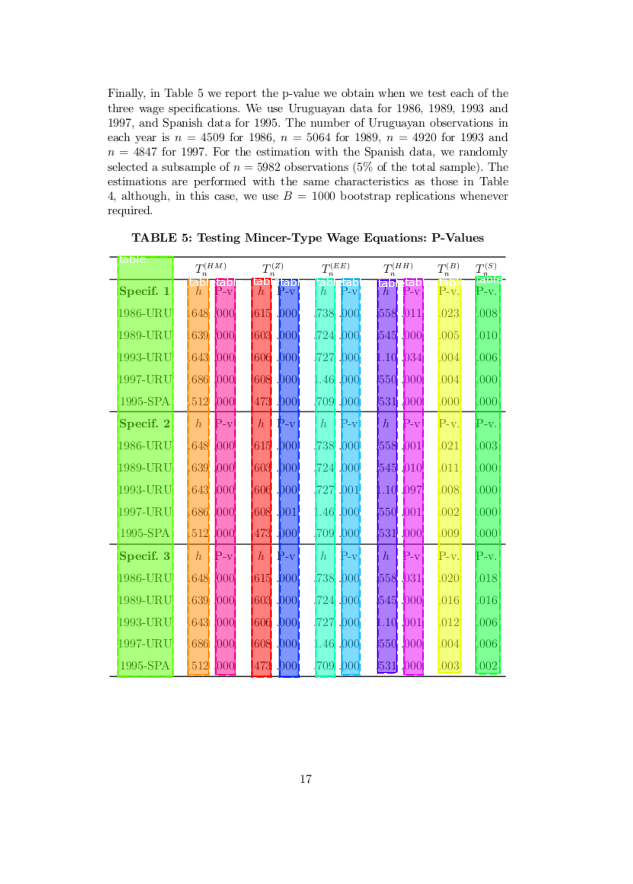

{'id': '10.1.1.100.308_18', 'source': 'data_set', 'path': '/content/drive/MyDrive/Zbiory danych/Marmot/images/10.1.1.100.308_18.bmp', 'annotation': '/content/drive/MyDrive/Zbiory danych/Marmot/annots/10.1.1.100.308_18.xml'}


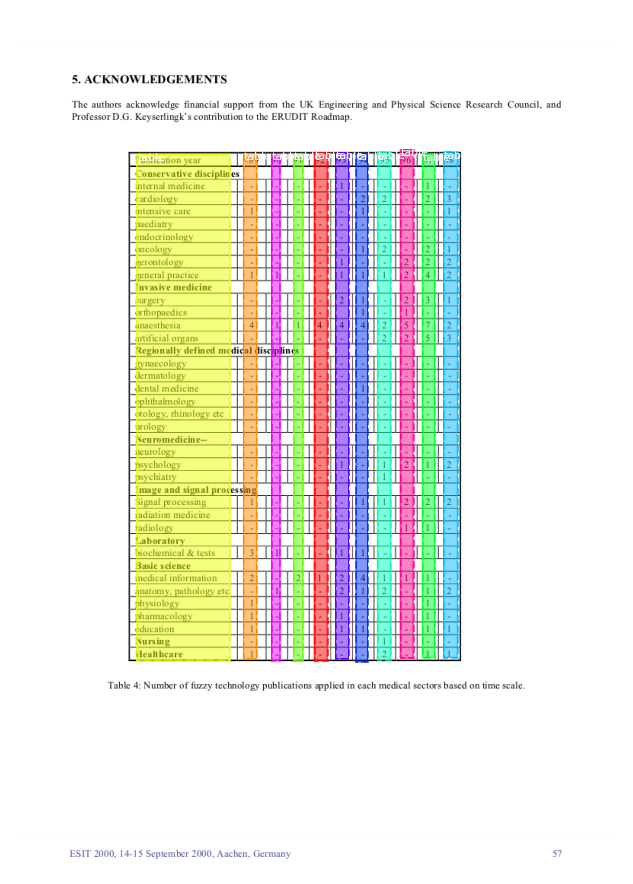

{'id': '10.1.1.6.2208_12', 'source': 'data_set', 'path': '/content/drive/MyDrive/Zbiory danych/Marmot/images/10.1.1.6.2208_12.bmp', 'annotation': '/content/drive/MyDrive/Zbiory danych/Marmot/annots/10.1.1.6.2208_12.xml'}
***********************************************************************************************************
Set len: 4


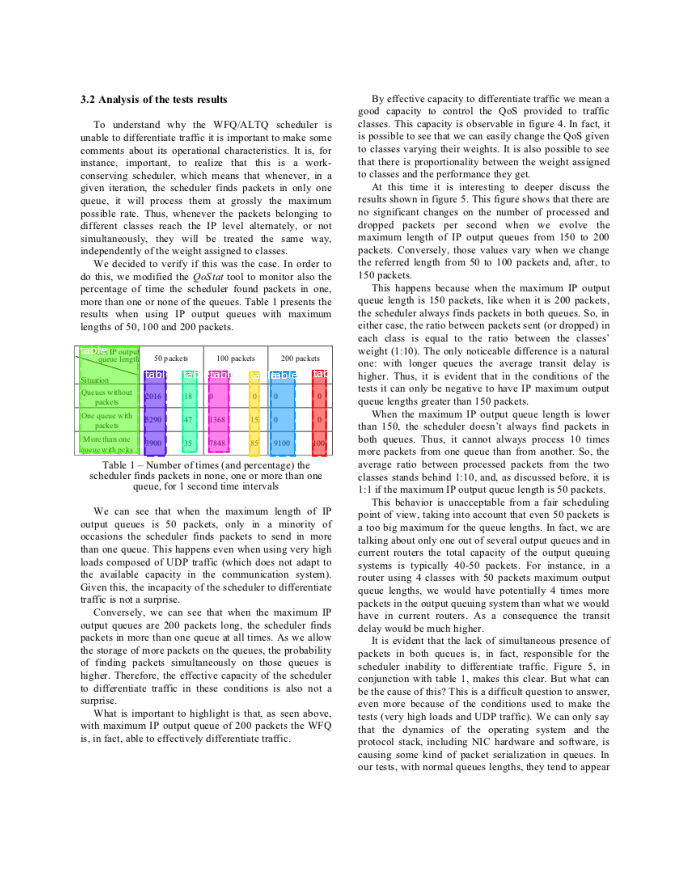

{'id': '10.1.1.35.2056_3', 'source': 'data_set', 'path': '/content/drive/MyDrive/Zbiory danych/Marmot/images/10.1.1.35.2056_3.bmp', 'annotation': '/content/drive/MyDrive/Zbiory danych/Marmot/annots/10.1.1.35.2056_3.xml'}


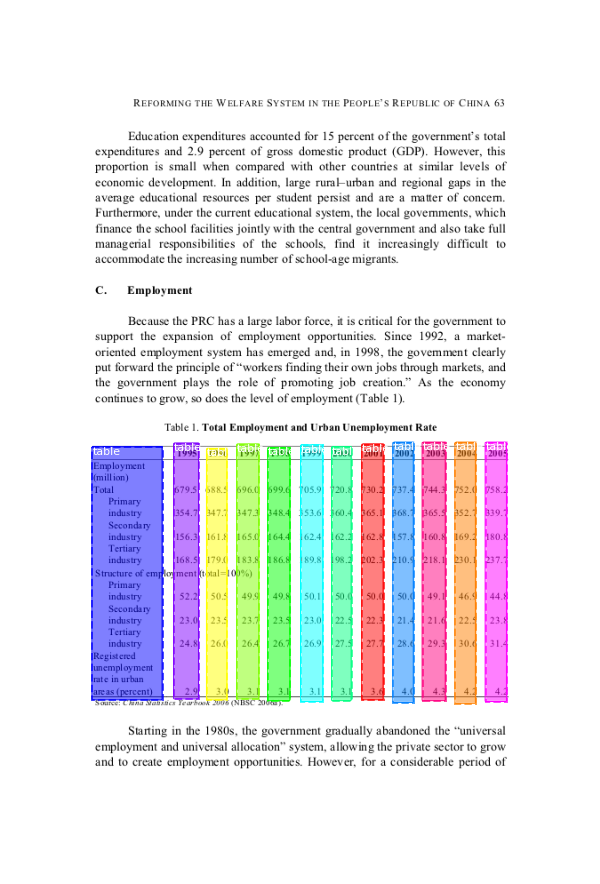

{'id': '10.1.1.177.3004_6', 'source': 'data_set', 'path': '/content/drive/MyDrive/Zbiory danych/Marmot/images/10.1.1.177.3004_6.bmp', 'annotation': '/content/drive/MyDrive/Zbiory danych/Marmot/annots/10.1.1.177.3004_6.xml'}


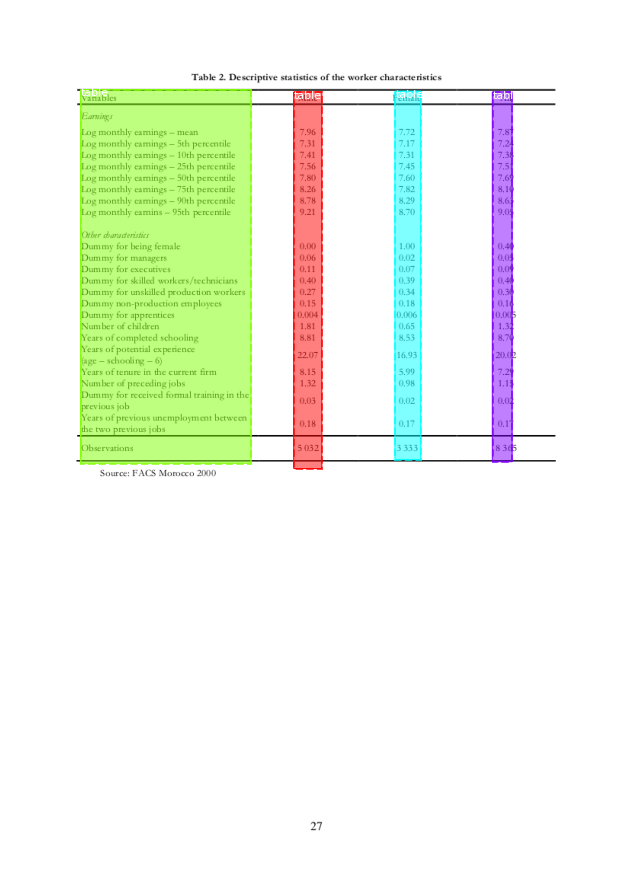

{'id': '10.1.1.190.2745_27', 'source': 'data_set', 'path': '/content/drive/MyDrive/Zbiory danych/Marmot/images/10.1.1.190.2745_27.bmp', 'annotation': '/content/drive/MyDrive/Zbiory danych/Marmot/annots/10.1.1.190.2745_27.xml'}
Sprawdzenie zbiorów uczącego i testowego: True

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
L

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple 

Epoch 1/16
490/490 [==============================] - 760s 2s/step - loss: 2.3239 - rpn_class_loss: 0.1748 - rpn_bbox_loss: 1.0653 - mrcnn_class_loss: 0.2120 - mrcnn_bbox_loss: 0.5093 - mrcnn_mask_loss: 0.3625 - val_loss: 2.8471 - val_rpn_class_loss: 0.0523 - val_rpn_bbox_loss: 1.5739 - val_mrcnn_class_loss: 0.2172 - val_mrcnn_bbox_loss: 0.5675 - val_mrcnn_mask_loss: 0.4363

Epoch 2/16
490/490 [==============================] - 494s 1s/step - loss: 1.6633 - rpn_class_loss: 0.0669 - rpn_bbox_loss: 0.8089 - mrcnn_class_loss: 0.2222 - mrcnn_bbox_loss: 0.2979 - mrcnn_mask_loss: 0.2673 - val_loss: 2.2551 - val_rpn_class_loss: 0.1034 - val_rpn_bbox_loss: 1.2098 - val_mrcnn_class_loss: 0.2783 - val_mrcnn_bbox_loss: 0.3491 - val_mrcnn_mask_loss: 0.3144
Epoch 3/16
490/490 [==============================] - 493s 1s/step - loss: 1.4313 - rpn_class_loss: 0.0477 - rpn_bbox_loss: 0.7070 - mrcnn_class_loss: 0.2023 - mrcnn_bbox_loss: 0.2369 - mrcnn_mask_loss: 0.2374 - val_loss: 2.4332 - val_rpn_class_

In [ ]:
# nauka sieci
train_set = Tables_data_set()
train_set.load_dataset('/content/drive/MyDrive/Zbiory danych/Marmot', is_train=True)
train_set.prepare()
print_data_info(train_set)

# testy sieci
test_set = Tables_data_set()
test_set.load_dataset('/content/drive/MyDrive/Zbiory danych/Marmot', is_train=False)
test_set.prepare()
print_data_info(test_set)
print('Sprawdzenie zbiorów uczącego i testowego:', check_data() == 0)

# model
configuration = Table_config()
configuration.display()
# definicja modelu
table_mrcnn = MaskRCNN(mode='training', model_dir='/content/drive/MyDrive/Zbiory danych/table_mrcnn_16/', config=configuration)
# zaladowanie wag modelu, usuniecie ostatnich warstw
table_mrcnn.load_weights('/content/drive/MyDrive/Mask RCNN/model coco/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
table_mrcnn.train(train_set, test_set, learning_rate=configuration.LEARNING_RATE, epochs=16, layers='heads')